In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [2]:
ship = sns.load_dataset("titanic")
ship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#如何避免主观猜测判断，怎样让数据特征的选择更有说服力，是否可以从逻辑的角度猜测？

survived：是否存活，0代表死亡，1代表幸存，与alive重复，保留survived列；

pclass：表示客舱等级，1级最高，反映乘船人身份和地位，是class的数值化表示，保留pclass列；

fare：船票的费用，同一个pclass里也可能有不同的费用，保留；

sex：乘客的性别，who、adult_male表示信息一致，保留sex列；

age：乘客年龄，保留；

sibsp：同代亲属数量， 保留；

parch：非同代亲属，保留；

embarked：上船地点，是embark_town的首字母简写，删除；

deck：乘客的舱位,保留；

alone：是否独自一人，保留；

In [3]:
#删除上述列，并将性别转化成0-1变量，male为1，female为0
ship = ship.drop(['alive', 'class', 'who', 'adult_male', 'embark_town'], axis=1)
ship.loc[ship.sex=='male', 'sex'] = 1
ship.loc[ship.sex=='female', 'sex'] = 0
ship.info()
ship.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null int64
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
deck        203 non-null category
alone       891 non-null bool
dtypes: bool(1), category(1), float64(2), int64(5), object(1)
memory usage: 57.9+ KB


(891, 10)

数据总量为891条，具有10个特征;

age缺失177条数据，考虑到age可能会影响救人时的决策，决定保留age列，使用填充的方法补全数据；

而deck缺失686条数据，舱位可能会反映乘客的经济实力，由于pclass和fare都可以表示类似的信息，删除该列；

In [4]:
#删除deck
ship = ship.drop(['deck'], axis=1)
#补充age缺失值，按照均值填充
ship['age'] = ship['age'].fillna(ship['age'].median())

In [5]:
#数据量化特征描述统计
ship.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### 数据集特征描述分析及可视化

#### 一维特征可视化

一维特征可视化主要用来对数据某个特征内部情况进行基础的透视，以Titanic数据集为例，可以进行的主要可视化工作有：

1、因变量**survived**幸存与死亡比例，得到整体的情况；

2、特征内部的结构与问题的研究高度相关，具有泛化特征更高层的表达能力，如**age**的结构反映了船上人们的年龄分布，**fare**可反映船上人的经济实力分布，从经验来看，以上二者均对人面对危机时做出的决策有重要影响；而**sex**与**pclass**与前者不同的是，**pclass**与**sex**比例往往是先验因素决定的，譬如船的容纳量与社会的男女性别比例，在该问题的研究中提供的信息较少，因此不予考虑；

- 可以考虑的图形有：饼图（环形图）、核密度直方图（sns.distplot）、计数图（sns.countplot）

In [6]:
#整体生存情况
survived = ship['survived'].value_counts()
survived

0    549
1    342
Name: survived, dtype: int64

In [7]:
#只有342个人存活
#计算生存比例
survived_perc = survived/survived.sum()
survived_perc

0    0.616162
1    0.383838
Name: survived, dtype: float64

Text(0,0.5,'')

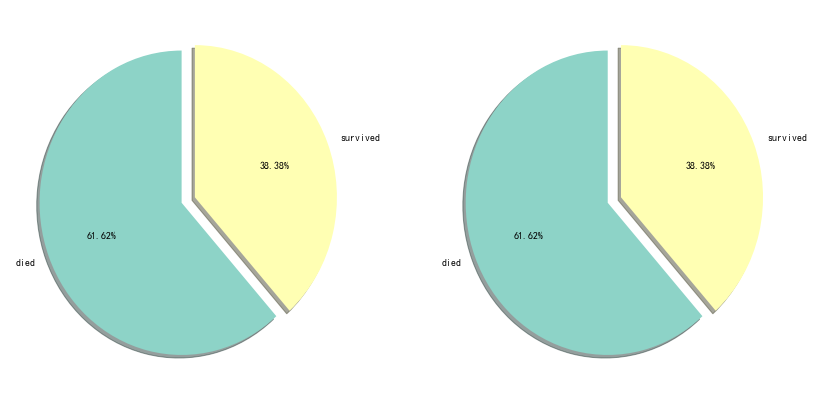

In [8]:
#绘制饼图
fig = plt.figure(figsize=(14, 7))#绘制画布，第一个位置是长度，第二个位置是宽度
label = ['died', 'survived']
explode = 0.05, 0.05

ax1 = fig.add_subplot(1, 2, 1)#添加子图对象，子图为ax1
ax1.pie(survived_perc, labels=label, startangle=90, explode=explode, shadow=True, autopct='%3.2f%%',
       colors=sns.color_palette("Set3", 10))

ax2 = fig.add_subplot(1, 2, 2)
ship['survived'].value_counts().plot.pie(labels=label, autopct='%1.2f%%', explode=explode, shadow=True, startangle=90,
                                        colors=sns.color_palette("Set3", 10))
plt.ylabel('')

In [9]:
# 测试sns.countplot
# a = [1]*5 + [2]*8 + [3]*2 + [4]*3 + [5]*4
# a = pd.Series(np.array(a))
# sns.countplot(a)#当不指定顺序时，默认按照统计数值从小到大排列
# 按数据量从大到小排列
# sns.countplot(a, order=a.value_counts().index)
# 设置调色板
# s = sns.countplot(a, order=a.value_counts().index, palette='Reds_r')
# s.set_xticks(range(6))
# s.set_xticklabels(['二', '一', '五', '四', '三', '空'])
# plt.xlabel('num')

关于sns.countplot参数的深入理解：

1、若计数的特征是**数值型**，则横轴默认是**从小到大**排列；

2、若想按照从大到小的顺序，加入order=a.value_counts().index，实际上是将数值变量**Unique()**之后按数量**从多到少**排序；

3、matplotlib和seaborn的绘图对象在设置坐标轴属性的方法上是一致的，对于seaborn生成的图像对象，可以用matplotlib调整横纵坐标的label；

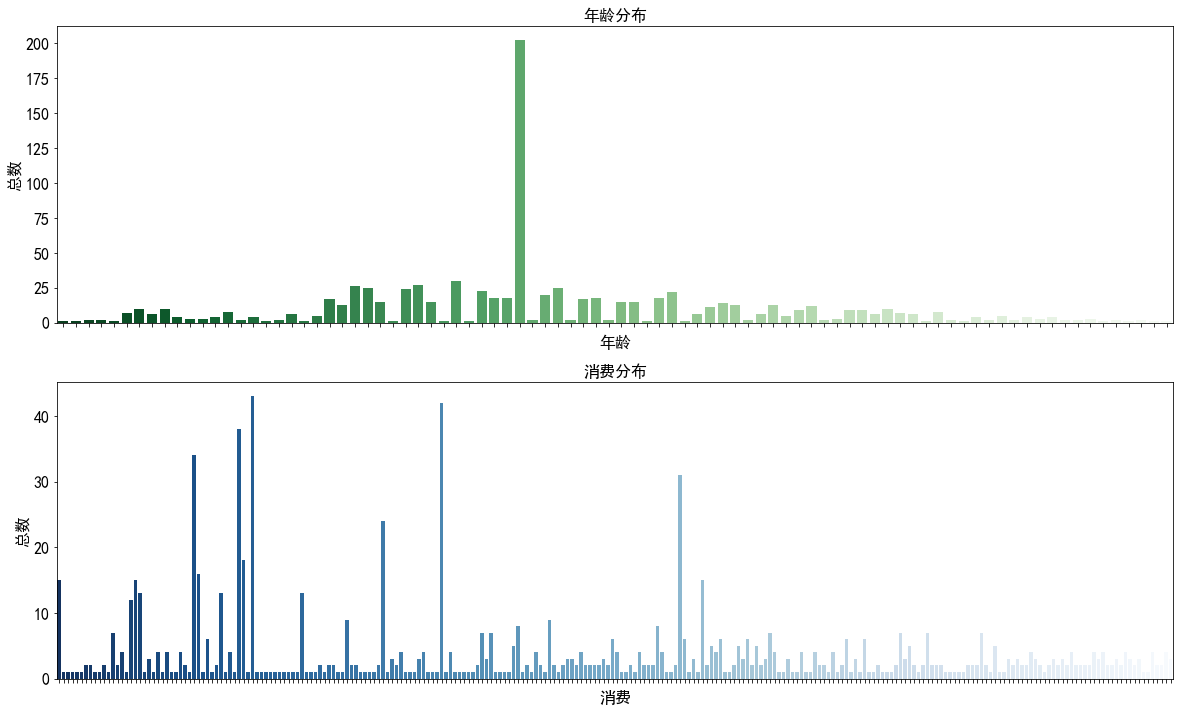

In [10]:
#年龄结构和消费可视化
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('age', data=ship, orient='h', palette='Greens_r')
ax1.set_xlabel('年龄', fontsize=16)
ax1.set_ylabel('总数', fontsize=16)
ax1.set_xticklabels([])
ax1.set_title('年龄分布', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)


ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('fare', data=ship, palette='Blues_r')
ax2.set_xlabel('消费', fontsize=16)
ax2.set_ylabel('总数', fontsize=16)
ax2.set_xticklabels([])
ax2.set_title('消费分布', fontsize=16)
ax2.tick_params(axis='both', labelsize=16)

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\mac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'消费密度分布')

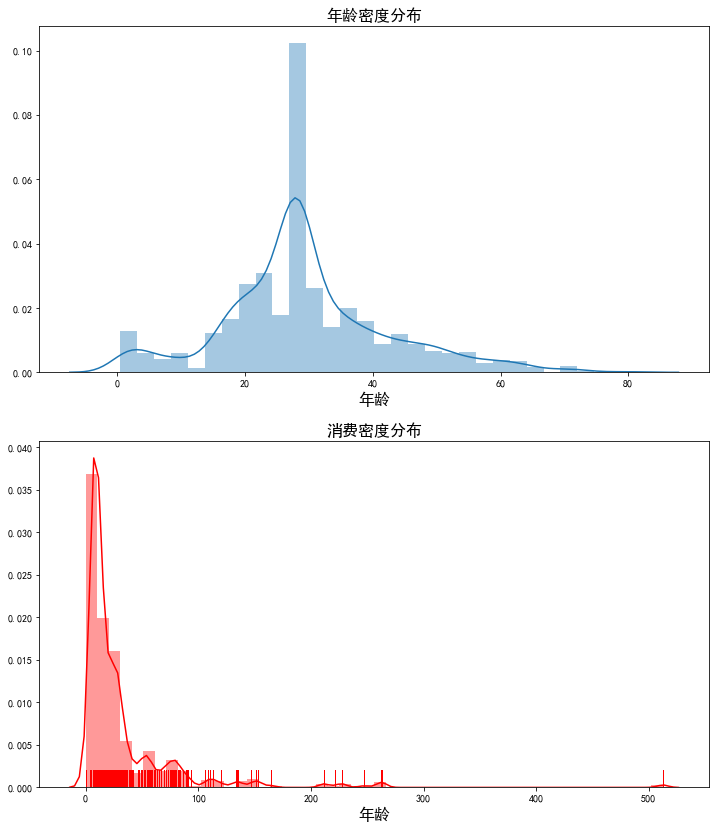

In [11]:
fig = plt.figure(figsize=(12, 14))

ax = fig.add_subplot(2, 1, 1)
ax = sns.distplot(ship['age'])
ax.set_xlabel('年龄', fontsize=16)
ax.set_title('年龄密度分布', fontsize=16)

ax = fig.add_subplot(2, 1, 2)
ax = sns.distplot(ship['fare'], color='r', rug=True)
ax.set_xlabel('年龄', fontsize=16)
ax.set_title('消费密度分布', fontsize=16)

#### 二维特征可视化

二维可视化主要考虑的是自变量与因变量之间的二维关系或相关性，在一维可视化的基础上进一步探究各特征与研究问题的相关性，具体而言可以从如下几个角度考虑（*数值型离散作为连续变量考虑*）：

- **分类变量与分类变量**。通常显示的是在不同类别里另一个特征的比例情况，如**survived**与**pclass**、**sex**。

- **分类变量与连续变量**。可以比较不同类别里连续变量的分布情况，譬如这里的**survived**与**age**，可以用前者作为分类变量，后者作为连续变量，绘出箱线图(**sns.boxenplot**)或小提琴图(**sns.swarmplot**)，当分类变量为两个变量时，可以使用双直方图(**plt.hist,plt.hist2d**)

- **连续变量与连续变量**。分析两个特征的相关性，联合分布（**sns.kdeplot**)回归拟合直线/皮尔斯相关系数/热力图/等高线图/联合分布（**sns.jointplot**)




In [12]:
sex = ship.groupby(['survived', 'sex']).size()
sex

survived  sex
0         0       81
          1      468
1         0      233
          1      109
dtype: int64

In [13]:
#转换为data.frame
sex = sex.unstack('sex')
sex = sex.rename(index={0:'遇难', 1:'存活'})
sex

sex,0,1
survived,,
遇难,81,468
存活,233,109


In [14]:
#计算生存比例
sex_perc = sex/sex.sum() #df可以做数学运算，sex.sum默认求和维度是0
sex_perc

sex,0,1
survived,,
遇难,0.257962,0.811092
存活,0.742038,0.188908


从结果看，女性的死亡率要远低于男性，对于这种二维分类比例的可视化，可以考虑条形堆叠图。以维度较高的轴作为横轴，以维度较低的作为堆叠。

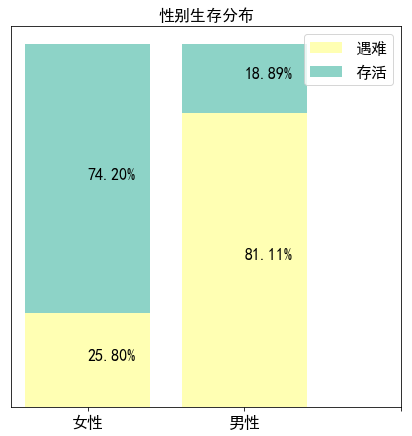

In [15]:
#绘制性别与死亡率的关系
fig = plt.figure(1, figsize=(7, 7))
ax1 = fig.add_subplot(1, 1, 1)
x = range(2)
a = sex_perc.loc['遇难', :]
b = sex_perc.loc['存活', :]
ax1.bar(x, a, label='遇难', color=sns.color_palette("Set3", 10)[1])
ax1.bar(x, b, bottom=a, label='存活', color=sns.color_palette("Set3", 10)[0])#通过bottom堆积
ax1.set_xticks(range(3)) #将x轴设置成容纳3个维度
ax1.set_xticklabels(['女性', '男性'], fontsize=16)
ax1.set_yticks([])
ax1.legend(['遇难', '存活'],fontsize=16)#按从下到上的顺序命名legend
ax1.set_title('性别生存分布',fontsize=16)
for x,y,z in zip(range(2), a, b):
    ax1.text(x, y/2, '{:.2%}'.format(y), fontsize=16)
    ax1.text(x, y+z/2, '{:.2%}'.format(z), fontsize=16)

In [16]:
#绘制pclass与存活率的关系
pclass = ship.groupby(['survived', 'pclass']).size()
pclass

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [17]:
# pclass.unstack('survived')

In [18]:
# pclass.unstack('pclass')
pclass = pclass.unstack()
pclass = pclass.rename(index={0:'遇难', 1:'幸存'})
pclass

pclass,1,2,3
survived,,,
遇难,80,97,372
幸存,136,87,119


In [19]:
pclass_perc = pclass/pclass.sum()
pclass_perc

pclass,1,2,3
survived,,,
遇难,0.37037,0.527174,0.757637
幸存,0.62963,0.472826,0.242363


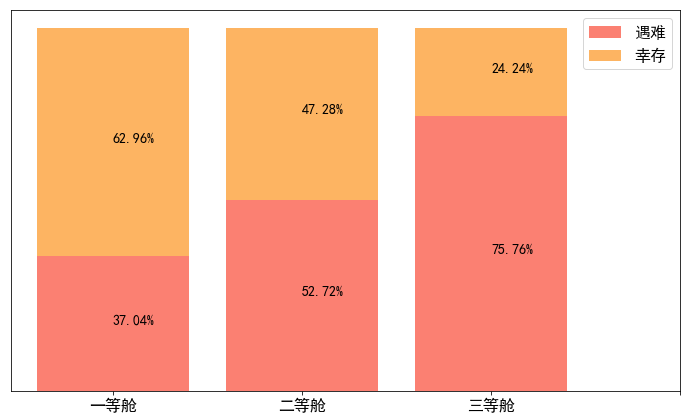

In [20]:
a = pclass_perc.loc['遇难', :]
b = pclass_perc.loc['幸存', :]
x = range(3)
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, a, label='遇难', color=sns.color_palette('Set3', 10)[3])
ax.bar(x, b, bottom=a, label='幸存', color=sns.color_palette('Set3', 10)[5])
ax.set_xticks(range(4))
ax.set_xticklabels(['一等舱', '二等舱', '三等舱'])
ax.legend(['遇难', '幸存'], fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.ticklabel_format
ax.set_yticks([])
for x, y, z in zip(x, a, b):
    ax.text(x, y/2, '{:.2%}'.format(y), fontsize=14)
    ax.text(x, y+z/2, '{:.2%}'.format(z), fontsize=14)

可以看出，三等舱中幸存比例最低，一等舱中幸存比例最高，可以认为pclass是影响存活率的因素之一

C:\Users\mac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'survived与fare')

<Figure size 1152x1152 with 0 Axes>

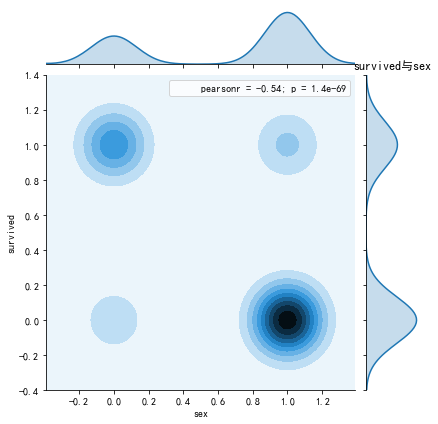

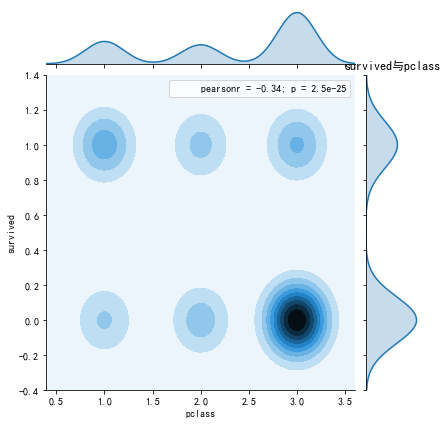

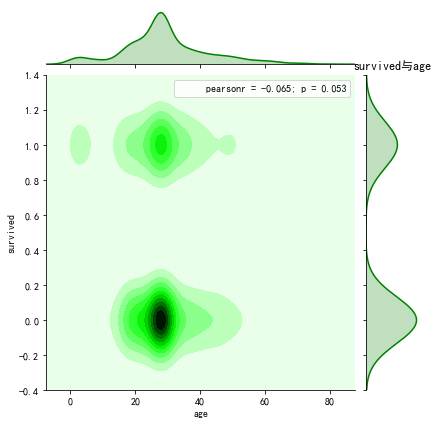

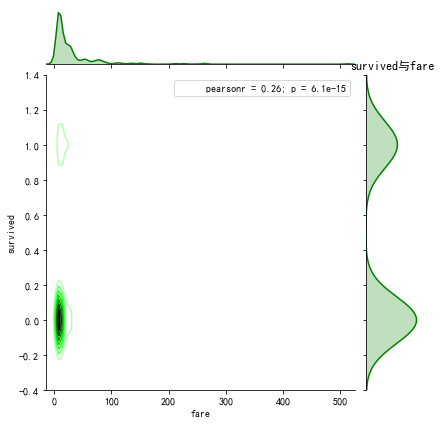

In [21]:
fig = plt.figure(figsize=(16, 16))

#ax = fig.add_subplot(2, 2, 1)
ax = sns.jointplot('sex', 'survived', data=ship, kind='kde')
plt.title('survived与sex')

#ax = fig.add_subplot(2, 2, 2)
ax = sns.jointplot('pclass', 'survived', data=ship, kind='kde')
plt.title('survived与pclass')

#ax = fig.add_subplot(2, 2, 3)
ax = sns.jointplot('age', 'survived', data=ship, kind='kde', color='g')
plt.title('survived与age')

#ax = fig.add_subplot(2, 2, 4)
ax = sns.jointplot('fare', 'survived', data=ship, kind='kde', color='g', shade=False)
plt.title('survived与fare')

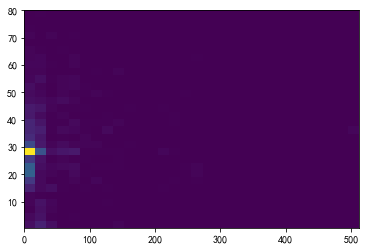

In [32]:
plt.hist2d(ship['fare'], ship['age'], bins=30)
plt.show()

sns.jointplot主要用来探究**两个**特征的联合分布，以可视化的形式探究是否存在相关性

#### 高维特征可视化

高维特征作特征之间相关性的探索，原理是将高维特征转化成二维特征的探索，连续变量更适合作为x和y轴，分类变量作为hue参数传入

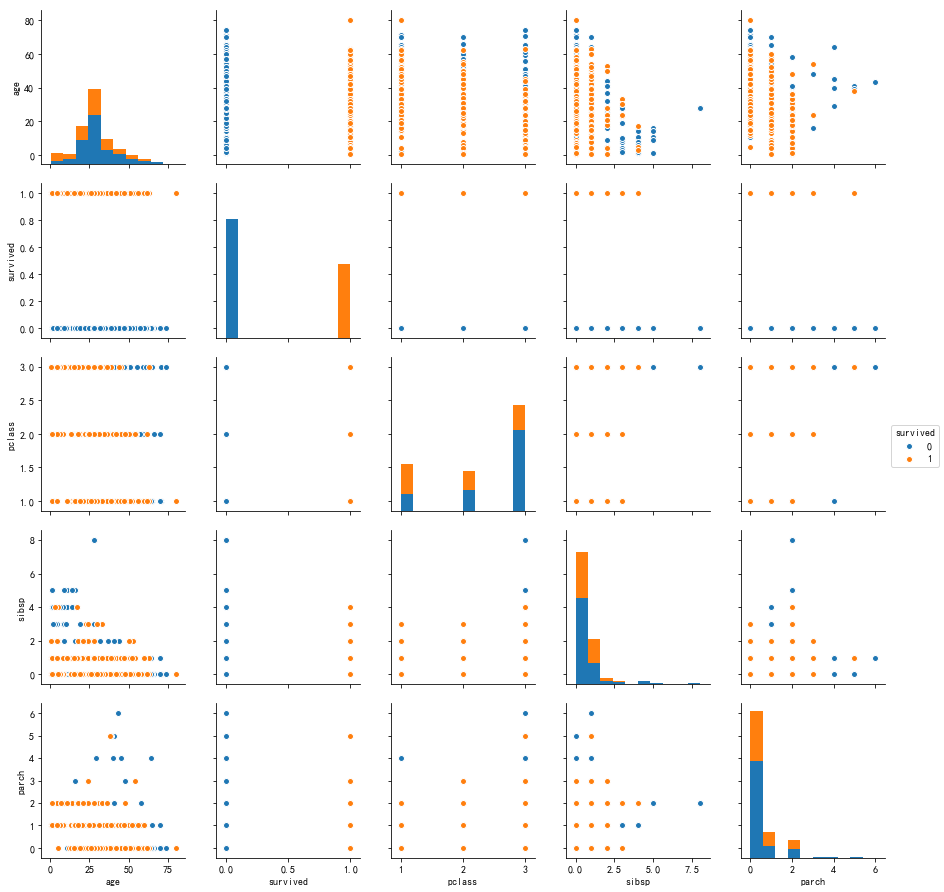

In [28]:
sns.pairplot(ship[['age', 'survived', 'pclass', 'sibsp', 'parch']], hue='survived')